In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/relay-node-data.csv")
df.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,10.1,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,anomaly
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


In [4]:
columns =(['real','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','real1','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','class'])

df.columns = columns
pd.set_option('display.max_columns', 500)
df.head()

,real,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,real1,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


In [5]:
df_new = df
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_new['protocol_type'] = labelencoder.fit_transform(df_new['protocol_type'])
df_new['service'] = labelencoder.fit_transform(df_new['service'])
df_new['flag'] = labelencoder.fit_transform(df_new['flag'])
df_new['class'] = labelencoder.fit_transform(df_new['class'])


In [6]:
df_new.head()


,real,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,real1,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,class
0,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
1,2,1,19,9,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1
2,0,0,13,9,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,0
3,1,1,55,2,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,0
4,0,1,22,9,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,1


In [7]:
X = df_new.iloc[:,0:41]  #independent columns
y = df_new.iloc[:,41]    #target column i.e price range

In [8]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [9]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [10]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 10 best features

                          Specs         Score
4                     src_bytes  1.015220e+08
5                     dst_bytes  3.690576e+07
0                          real  2.300625e+06
32               dst_host_count  7.044734e+05
22               is_guest_login  3.725777e+05
31           srv_diff_host_rate  1.272281e+05
23                        count  5.152715e+04
2                       service  2.476673e+04
3                          flag  1.060705e+04
11            num_failed_logins  3.819467e+03
26              srv_serror_rate  3.787970e+03
27                  rerror_rate  3.738992e+03
40         dst_host_rerror_rate  3.569640e+03
39     dst_host_srv_serror_rate  3.451346e+03
33           dst_host_srv_count  2.328061e+03
25                  serror_rate  1.663790e+03
24                    srv_count  1.649107e+03
38         dst_host_serror_rate  1.624100e+03
37  dst_host_srv_diff_host_rate  1.534938e+03
28              srv_rerror_rate  1.350584e+03
15                 su_attempted  1

[1.45571323e-02 4.72114980e-02 1.01485986e-01 4.86189542e-02
 4.19832325e-02 1.86994970e-02 1.50990894e-05 1.07882069e-03
 1.39529875e-04 1.39611140e-02 6.31439670e-03 9.30725415e-02
 6.68721652e-03 6.92244122e-04 7.61835487e-05 5.72868517e-04
 4.96597346e-04 3.32199472e-04 7.03242181e-04 0.00000000e+00
 2.90401613e-04 1.94692482e-02 2.48955873e-02 2.49384199e-02
 1.04758814e-02 1.66295736e-02 3.37593729e-02 4.71395850e-02
 3.53057519e-02 6.52196292e-03 1.30700248e-02 3.28352396e-02
 8.83699303e-02 7.28674335e-02 1.88495139e-02 3.24984937e-02
 9.77752119e-03 1.54938452e-02 1.09012409e-02 5.45747305e-02
 3.46378884e-02]


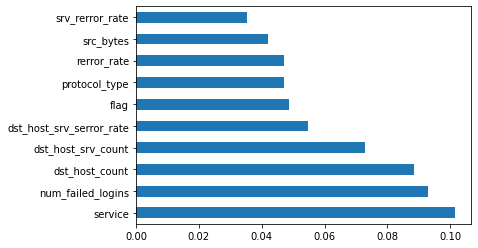

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
print(X_train.shape)
print(y_train.shape)

(18034, 41)
(18034,)


In [14]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(X_train, y_train)
pred_svc=model_svc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_svc))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred_svc)))
svm = accuracy_score(y_test, pred_svc)

              precision    recall  f1-score   support

           0       0.58      1.00      0.73      2532
           1       0.97      0.08      0.14      1977

    accuracy                           0.59      4509
   macro avg       0.78      0.54      0.44      4509
weighted avg       0.75      0.59      0.48      4509

Accuracy: 0.595


In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
knn = accuracy_score(y_test, y_pred)

[[2490   42]
 [ 107 1870]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2532
           1       0.98      0.95      0.96      1977

    accuracy                           0.97      4509
   macro avg       0.97      0.96      0.97      4509
weighted avg       0.97      0.97      0.97      4509



In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred_class = regressor.predict(X_test)
print(confusion_matrix(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))
rf = accuracy_score(y_test, y_pred_class)

[[2501   31]
 [  38 1939]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2532
           1       0.98      0.98      0.98      1977

    accuracy                           0.98      4509
   macro avg       0.98      0.98      0.98      4509
weighted avg       0.98      0.98      0.98      4509



In [17]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
pred_nb=model_nb.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred_nb))
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred_nb)))
nb = accuracy_score(y_test, pred_nb)

              precision    recall  f1-score   support

           0       0.92      0.64      0.75      2532
           1       0.67      0.93      0.77      1977

    accuracy                           0.76      4509
   macro avg       0.79      0.78      0.76      4509
weighted avg       0.81      0.76      0.76      4509

Accuracy: 0.763


In [18]:
data = {'Algorithms':['Naive Bayes', 'SVM', 'KNN', 'Random Forest Classifier'],'Accuracy':[nb,svm,knn,rf]}
df = pd.DataFrame(data)
print(df)

                 Algorithms  Accuracy
0               Naive Bayes  0.763362
1                       SVM  0.594589
2                       KNN  0.966955
3  Random Forest Classifier  0.984697


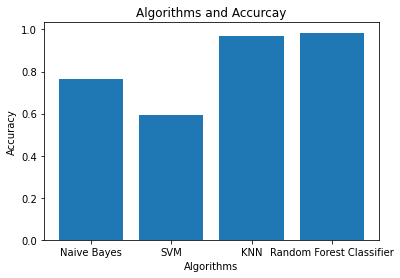

In [19]:
plt.bar(df['Algorithms'],df['Accuracy'])
plt.title('Algorithms and Accurcay')
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
plt.show()
